In [5]:
import pandas as pd
import matplotlib.pyplot as plt
reactive = pd.read_csv("../data_csv/core4_ipynb2_reactive_ts.csv")
proactive = pd.read_csv("../data_csv/core4_ipynb2_proactive_ts.csv")

시간 컬럼 통일

In [6]:
reactive["DATE_TIME"] = pd.to_datetime(reactive["DATE_TIME"])
proactive["DATE_TIME"] = pd.to_datetime(proactive["DATE_TIME"])

reactive = reactive.sort_values("DATE_TIME")
proactive = proactive.sort_values("DATE_TIME")

reactive.head(), proactive.head()

(            DATE_TIME  demand_kw  load_adj_kw  discharge_kw    soc_kwh
 0 2020-05-15 00:00:00   2.970000     2.970000           0.0  27.839622
 1 2020-05-15 00:15:00   2.978592     2.978592           0.0  27.839622
 2 2020-05-15 00:30:00   2.987182     2.987182           0.0  27.839622
 3 2020-05-15 00:45:00   2.995771     2.995771           0.0  27.839622
 4 2020-05-15 01:00:00   3.004358     3.004358           0.0  27.839622,
             DATE_TIME  demand_kw  load_adj_kw  discharge_kw    soc_kwh
 0 2020-05-15 00:00:00   2.970000     2.970000           0.0  27.839622
 1 2020-05-15 00:15:00   2.978592     2.978592           0.0  27.839622
 2 2020-05-15 00:30:00   2.987182     2.987182           0.0  27.839622
 3 2020-05-15 00:45:00   2.995771     2.995771           0.0  27.839622
 4 2020-05-15 01:00:00   3.004358     3.004358           0.0  27.839622)

Reactive vs Proactive 시계열 비교: load_adj_kw 기준

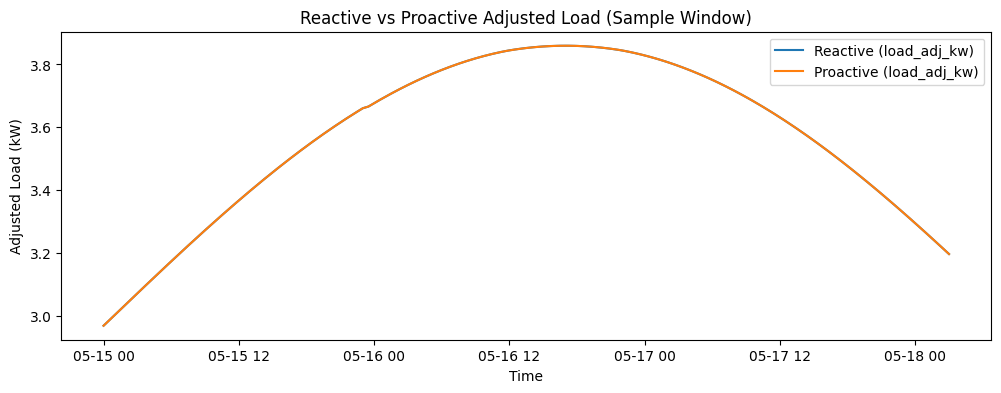

In [7]:
n = 300

plt.figure(figsize=(12,4))
plt.plot(reactive["DATE_TIME"][:n], reactive["load_adj_kw"][:n], label="Reactive (load_adj_kw)")
plt.plot(proactive["DATE_TIME"][:n], proactive["load_adj_kw"][:n], label="Proactive (load_adj_kw)")
plt.legend()
plt.title("Reactive vs Proactive Adjusted Load (Sample Window)")
plt.xlabel("Time")
plt.ylabel("Adjusted Load (kW)")
plt.show()

demand_kw도 같이 비교

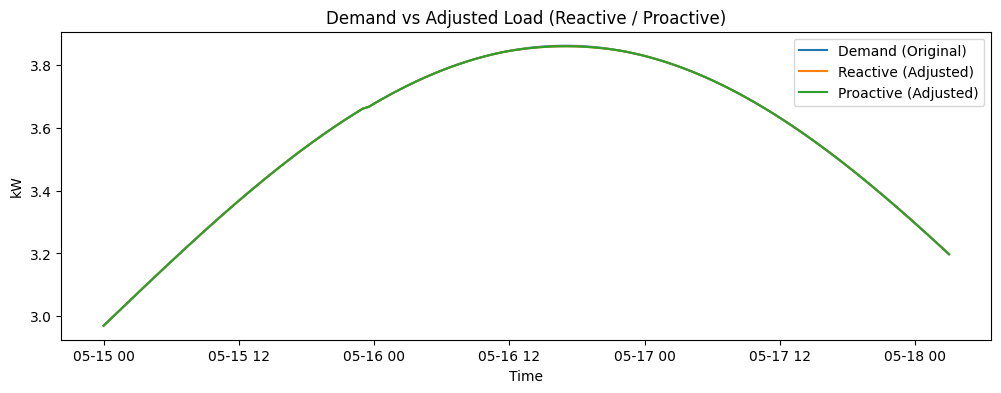

In [8]:
n = 300

plt.figure(figsize=(12,4))
plt.plot(reactive["DATE_TIME"][:n], reactive["demand_kw"][:n], label="Demand (Original)")
plt.plot(reactive["DATE_TIME"][:n], reactive["load_adj_kw"][:n], label="Reactive (Adjusted)")
plt.plot(proactive["DATE_TIME"][:n], proactive["load_adj_kw"][:n], label="Proactive (Adjusted)")
plt.legend()
plt.title("Demand vs Adjusted Load (Reactive / Proactive)")
plt.xlabel("Time")
plt.ylabel("kW")
plt.show()

지표 테이블 로드

In [9]:
metrics = pd.read_csv("../data_csv/core4_ipynb2_metrics.csv")
metrics

,scenario,peak_exceed_count,avg_ramp,risky_ramp,load_deficit_sum,ESS_throughput_kwh,SOC_violation_count
0,Reactive EMS (actual trigger),163,0.006101,163,1.656912,0.046025,0
1,Proactive EMS (shift trigger),163,0.006101,163,1.657273,0.046025,0


Core2에서 보여줄 테이블: Peak 초과 횟수 / 평균 ramp

In [10]:
summary_table = metrics[["scenario", "peak_exceed_count", "avg_ramp", "risky_ramp"]].copy()
summary_table

,scenario,peak_exceed_count,avg_ramp,risky_ramp
0,Reactive EMS (actual trigger),163,0.006101,163
1,Proactive EMS (shift trigger),163,0.006101,163


### 결론

규칙은 동일하더라도, 예측 정보를 입력으로 사용할 수 있는지 여부가 제어 결과 자체를 바꾼다.  
즉, 제어 성능의 차이는 규칙 설계보다 입력 정보(예측 신호)의 유무 및 밀도에서 발생한다.